<a href="https://colab.research.google.com/github/Pigwen/fastbook/blob/main/Ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [15]:
import pathlib
from google.colab import userdata

key = os.environ.get("AZURE_SEARCH_KEY", userdata.get("bing_key"))

bear_types = ["grizzly", "black", "teddy"]
path = Path("bear")
#path.delete()

if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path / o)
    dest.mkdir(exist_ok=True)
    print(f"dest is {dest}")
    results = search_images_bing(key, f"{o} bear")
    print(f"finish search '{o} bear'")
    download_images(dest, urls=results.attrgot("contentUrl"))
    print(f"finish downloading {o} bear")

fns = get_image_files(path)
failed = verify_images(fns)
print(failed)

failed.map(Path.unlink)

dest is bear/grizzly
finish search 'grizzly bear'


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish downloading grizzly bear
dest is bear/black
finish search 'black bear'
finish downloading black bear
dest is bear/teddy
finish search 'teddy bear'
finish downloading teddy bear
[Path('bear/black/9648a1f2-c6c0-4406-a41a-9645685fd8ef.jpg'), Path('bear/black/a3ac5b6e-475d-44c0-abb7-0db610defac4.jpg'), Path('bear/black/22ce2d2f-307b-4ef3-aa5b-02a662f8262d.jpg'), Path('bear/black/c9f6327a-2e1f-4786-bf98-a07df5de90a7.jpg'), Path('bear/black/083b7fda-43c4-4a96-82d4-4566606d5764.jpg'), Path('bear/grizzly/add175d5-c3b5-4bc4-be61-d9daa98b4e89.jpg'), Path('bear/grizzly/f84eb7eb-8344-4295-9980-ae7d6c956098.jpg'), Path('bear/teddy/e564f16d-a27f-4e0c-8b28-9cc0773f2ba8.jpg'), Path('bear/teddy/cf0e58e9-7876-4bd4-bb7c-322869c66133.jpg'), Path('bear/teddy/4b5deb57-00de-4788-8856-2f561f3fe66b.jpg'), Path('bear/teddy/6ddec36d-c98f-4d48-a06a-be57b4974301.jpg'), Path('bear/teddy/e87b23aa-41f4-4384-af81-4bc568235aae.jpg'), Path('bear/teddy/9767ae98-2ecc-4cf2-8f6d-17a4fd261e05.jpg'), Path('bear/teddy/4

(#19) [None,None,None,None,None,None,None,None,None,None...]

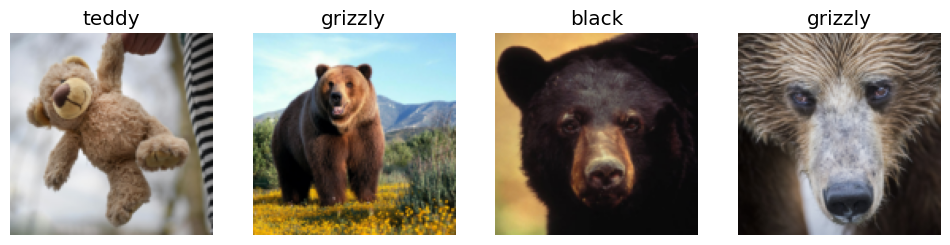

In [18]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


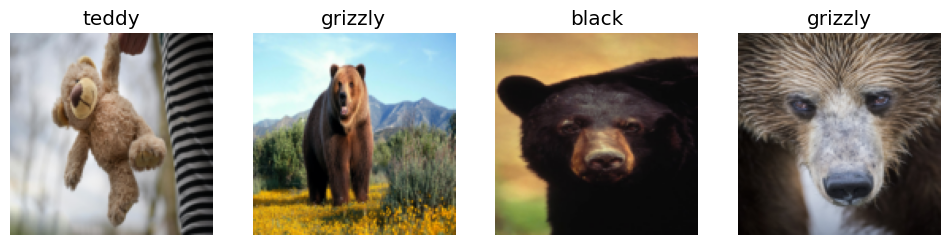

In [19]:
bears2 = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears2.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

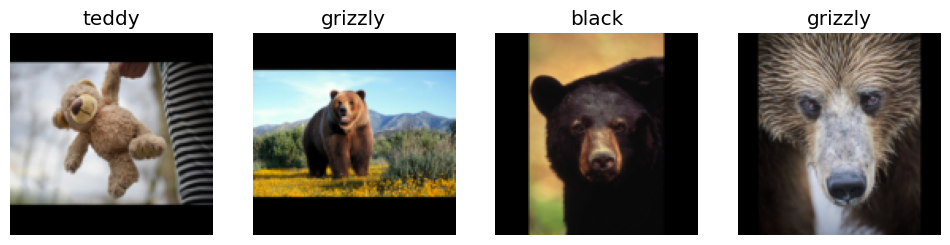

In [20]:
bears2 = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = bears2.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

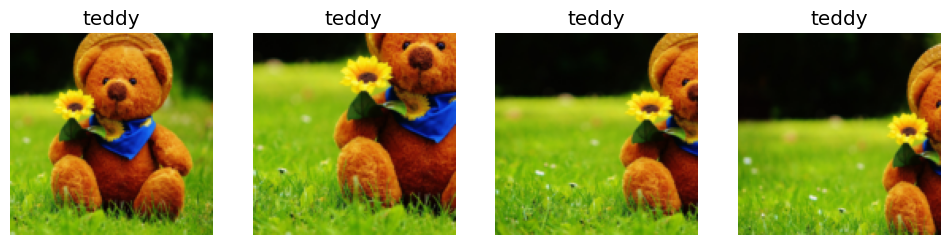

In [24]:
bears2 = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears2.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

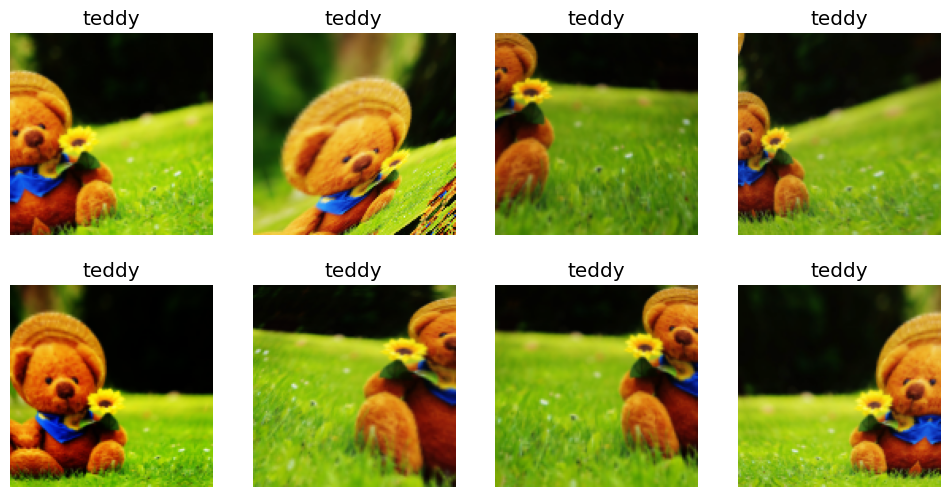

In [27]:
bears3 = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears3.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)